# Employee Promotion Prediction EDA

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

### Load the datasets and merge them for preprocessing

In [2]:
train_df=pd.read_csv('D:\EmployeePromotionProject\data\\train.csv')
test_df=pd.read_csv('D:\EmployeePromotionProject\data\\test.csv')

#merge
train_test_df=pd.concat([train_df, test_df], axis=0, ignore_index=True)

#store the merged dataset into local storage
train_test_df.to_csv('merged_train_test.csv', index=False)

In [3]:
train_test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0.0


In [4]:
train_df.shape

(54808, 13)

In [5]:
test_df.shape

(23490, 12)

In [6]:
train_test_df.shape

(78298, 13)

In [7]:
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  awards_won?           78298 non-null  int64  
 11  avg_training_score    78298 non-null  int64  
 12  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 7.8+ MB


In [8]:
train_test_df.drop(columns='employee_id', inplace=True)

In [9]:
train_test_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0.0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0.0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0.0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0.0


In [10]:
train_test_df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,1.253378,34.797619,3.332219,5.848974,0.023053,63.349664,0.085170
std,0.606766,7.665928,1.260982,4.248070,0.150073,13.383664,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


### Data Cleaning and Data Preprocessing

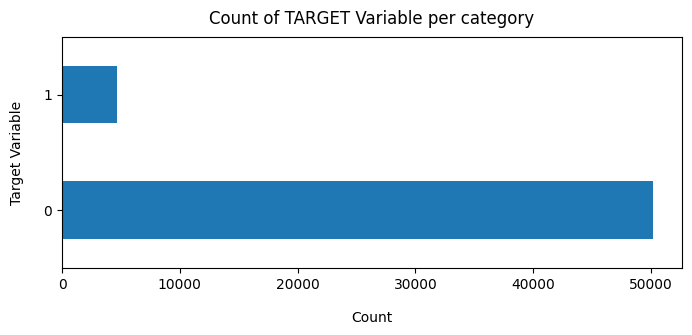

In [11]:
#For classification problems, always have a look at the ratio of the output categories.
train_df['is_promoted'].value_counts().plot(kind='barh', figsize=(8, 3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

#1 means promoted; 0 means not promoted.

In [12]:
#percetage of values in each category
100*train_df['is_promoted'].value_counts()/len(train_df['is_promoted'])

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

#### Missing values treatment

In [13]:
train_test_copy1=train_test_df.copy()

In [14]:
train_test_copy1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0.0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0.0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0.0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0.0


In [15]:
train_test_copy1.isnull().sum()

department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

<AxesSubplot:>

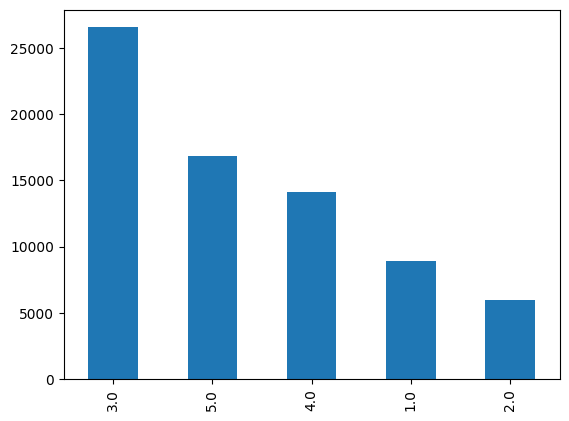

In [16]:
train_test_copy1['previous_year_rating'].value_counts().plot(kind='bar')

<AxesSubplot:>

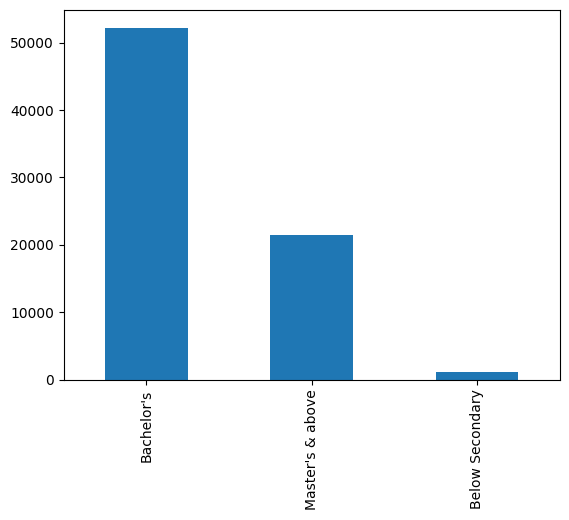

In [17]:
train_test_copy1['education'].value_counts().plot(kind='bar')

In [18]:
print(train_test_copy1['education'].value_counts())

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64


In [19]:
print(train_test_copy1['previous_year_rating'].value_counts())

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64


In [20]:
#filling missing values of 'education' and 'previous_year_rating' with MODE
train_test_copy1['education'] = train_test_copy1['education'].fillna(train_test_copy1['education'].mode()[0])
train_test_copy1['previous_year_rating'] = train_test_copy1['previous_year_rating'].fillna(train_test_copy1['previous_year_rating'].mode()[0])

#function to fill missing values with a particular value:

# def fill_missing(df, column, value):
#     df[column].fillna(value=value,inplace=True)
#     return df

In [21]:
train_test_copy1.isnull().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

#### Converting 'Object' data into Categorical data

In [22]:
train_test_copy1.department.value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [23]:
train_test_copy1.region.value_counts()

region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64

In [24]:
train_test_copy1.education.value_counts()

Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [25]:
train_test_copy1.gender.value_counts()

m    55092
f    23206
Name: gender, dtype: int64

In [26]:
train_test_copy1.recruitment_channel.value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

In [27]:
def convert_to_category(df, column_list):
    df[column_list] = df[column_list].apply(lambda x: x.astype('category'))
    return df

train_test_copy1 = convert_to_category(train_test_copy1, ['department','region','education','gender','recruitment_channel'])

In [28]:
train_test_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   department            78298 non-null  category
 1   region                78298 non-null  category
 2   education             78298 non-null  category
 3   gender                78298 non-null  category
 4   recruitment_channel   78298 non-null  category
 5   no_of_trainings       78298 non-null  int64   
 6   age                   78298 non-null  int64   
 7   previous_year_rating  78298 non-null  float64 
 8   length_of_service     78298 non-null  int64   
 9   awards_won?           78298 non-null  int64   
 10  avg_training_score    78298 non-null  int64   
 11  is_promoted           54808 non-null  float64 
dtypes: category(5), float64(2), int64(5)
memory usage: 4.6 MB


#### Univariate Analysis

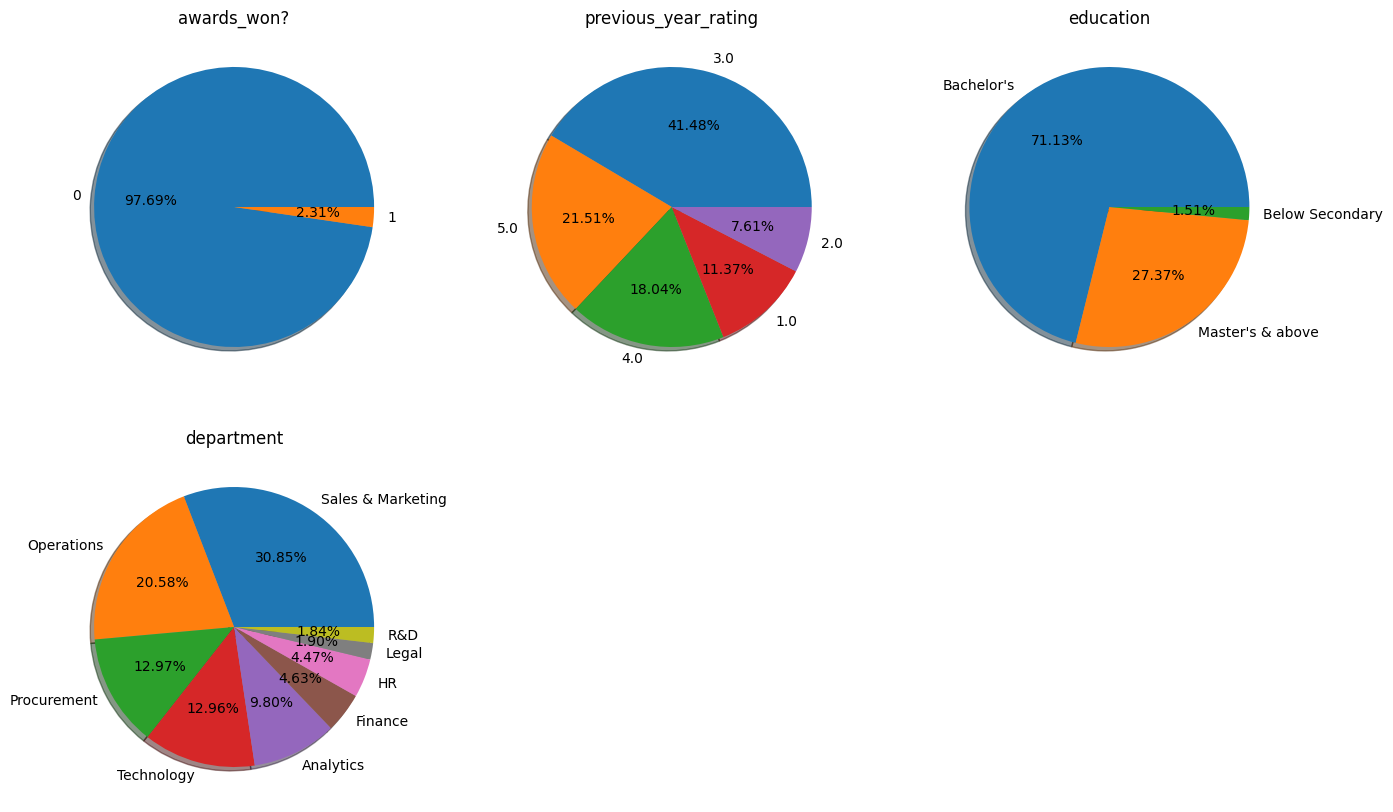

In [29]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.axis('off')
plt.title('awards_won?')
train_test_copy1['awards_won?'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(232)
plt.axis('off')
plt.title('previous_year_rating')
train_test_copy1['previous_year_rating'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(233)
plt.axis('off')
plt.title('education')
train_test_copy1['education'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(234)
plt.axis('off')
plt.title('department')
train_test_copy1['department'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.show()

#### Bivariate Analysis

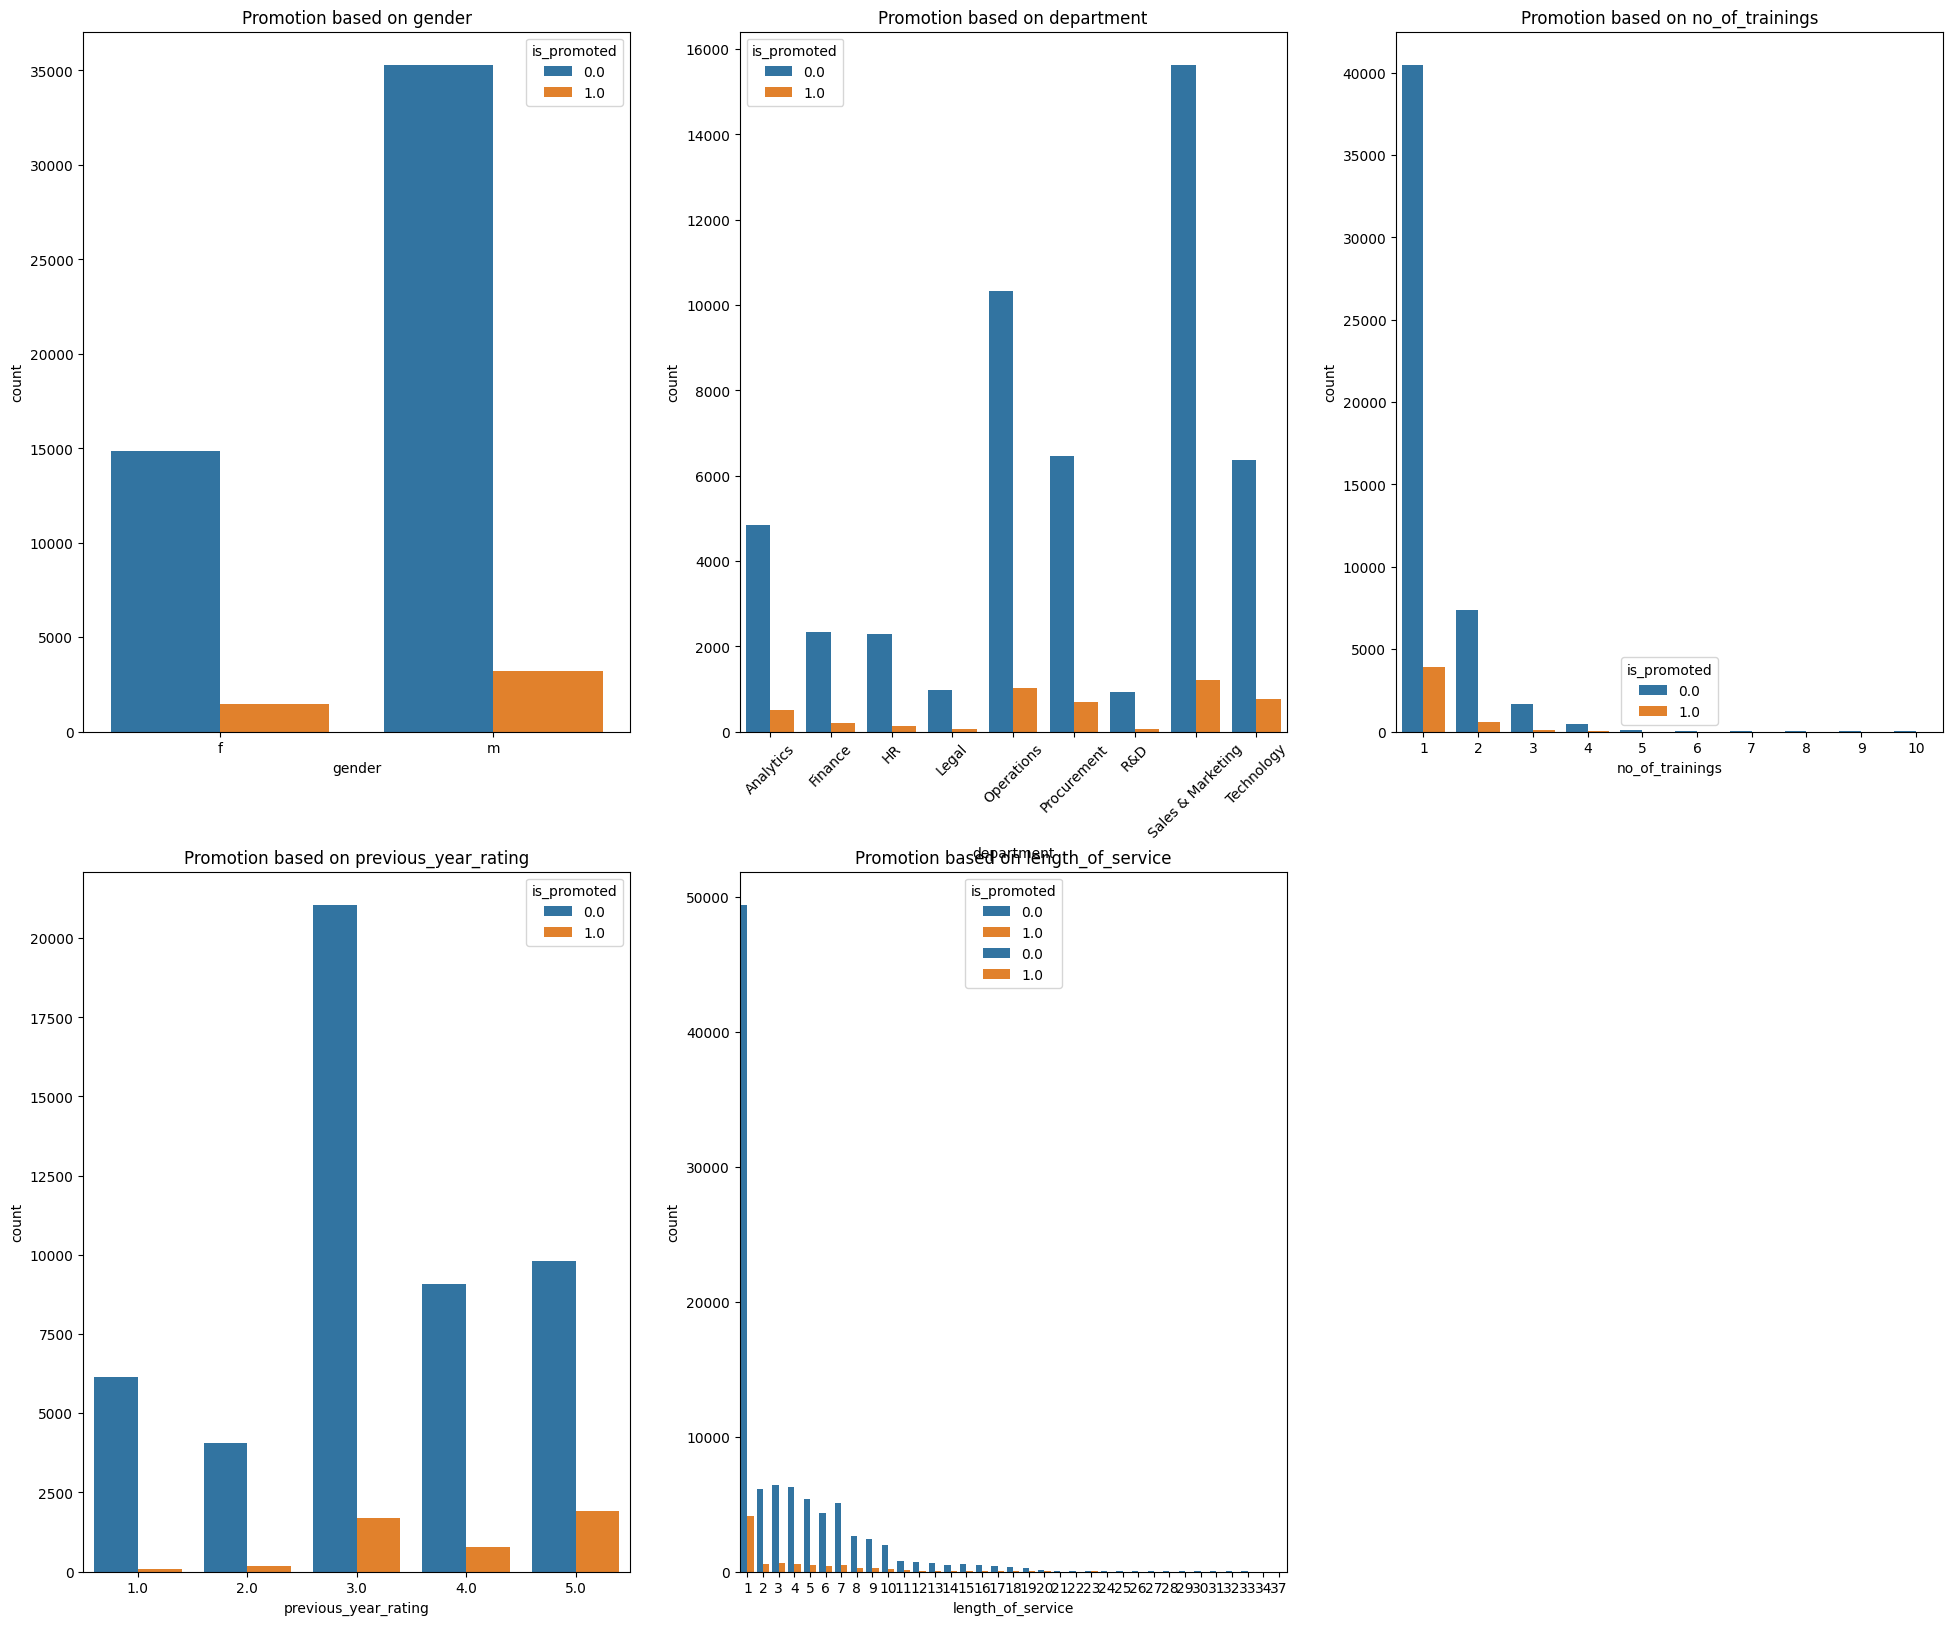

In [30]:
plt.figure(figsize=(24,20))

plt.subplot(231)
sns.countplot(train_test_copy1['gender'],hue=train_test_copy1['is_promoted'])
plt.title('Promotion based on gender')

plt.subplot(232)
plt.xticks(rotation=45)
sns.countplot(train_test_copy1['department'],hue=train_test_copy1['is_promoted'])
plt.title('Promotion based on department')

plt.subplot(233)
sns.countplot(train_test_copy1['no_of_trainings'],hue=train_test_copy1['is_promoted'])
plt.title('Promotion based on no_of_trainings')

plt.subplot(234)
sns.countplot(train_test_copy1['previous_year_rating'],hue=train_test_copy1['is_promoted'])
plt.title('Promotion based on previous_year_rating')

plt.subplot(235)
sns.countplot(train_test_copy1['awards_won?'],hue=train_test_copy1['is_promoted'])
plt.title('Promotion based on awards_won?')

plt.subplot(235)
sns.countplot(train_test_copy1['length_of_service'],hue=train_test_copy1['is_promoted'])
plt.title('Promotion based on length_of_service')

plt.show()

Text(0.5, 1.0, 'Promotion based on region')

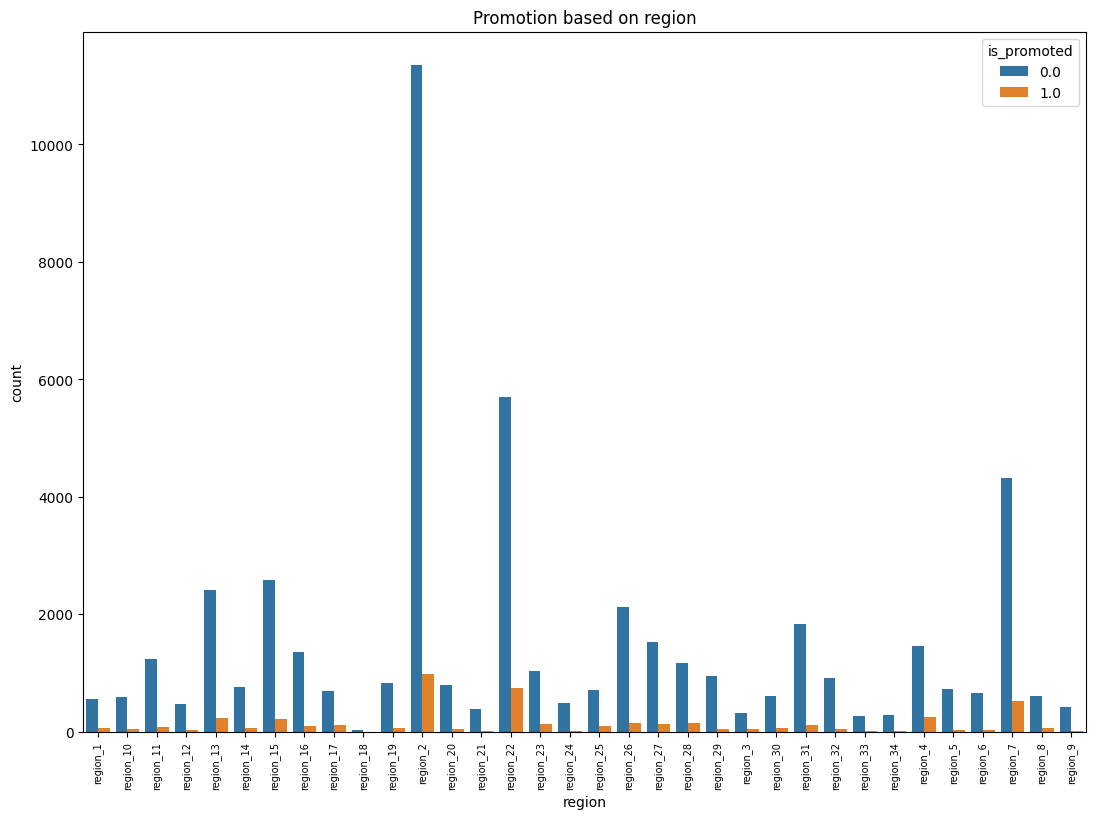

In [31]:
plt.figure(figsize=(44,20))
plt.subplot(231)
plt.xticks(rotation =90,fontsize =7)
sns.countplot(train_test_copy1['region'],hue=train_test_copy1['is_promoted'])
plt.title('Promotion based on region')

#### Outlier Treatment

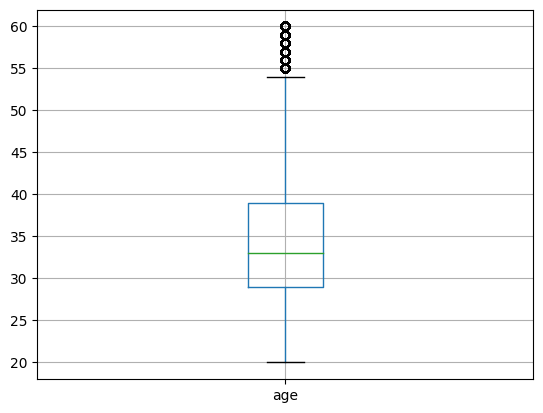

In [32]:
#we use boxplot for outlier detection

#function to create box plot:
# def plot_boxplot(data, feature):
#    feature_data=data[feature]
#    fig, ax=plt.subplots()
#    ax.boxplot(feature_data)
#    ax.set_title(f'Box plot for {feature}')
#    ax.set_ylabel(feature)

#    plt.show()

figure=train_test_copy1.boxplot(column="age")

In [33]:
train_test_copy1.loc[train_test_copy1['age']>=56,'age']=56

<AxesSubplot:xlabel='age', ylabel='Density'>

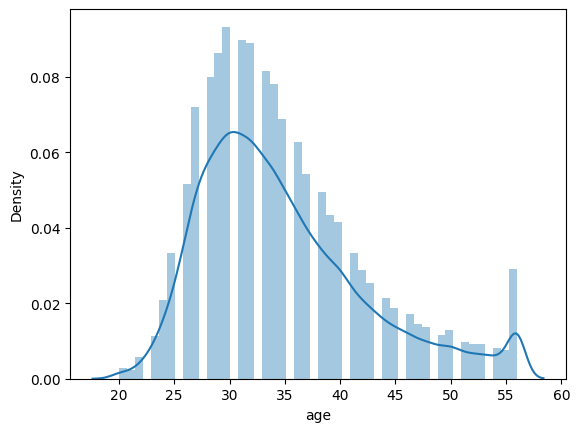

In [34]:
sns.distplot(train_test_copy1['age'])

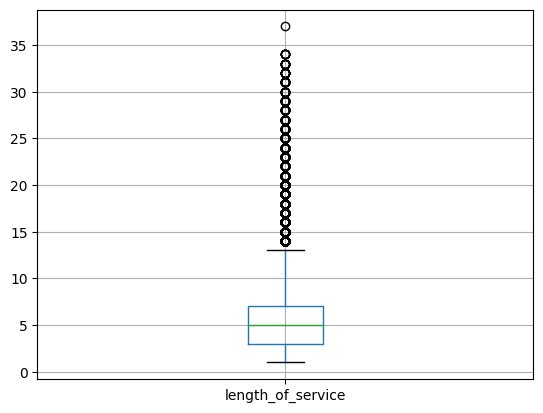

In [35]:
figure=train_test_copy1.boxplot(column="length_of_service")

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

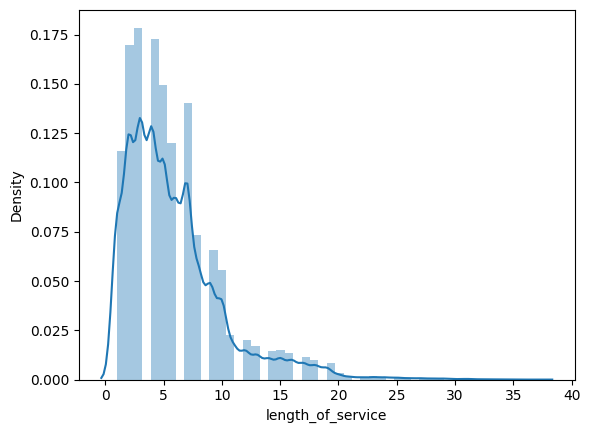

In [36]:
sns.distplot(train_test_copy1['length_of_service'])

In [37]:
train_test_copy1.loc[train_test_copy1['length_of_service']>=25,'length_of_service']=25

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

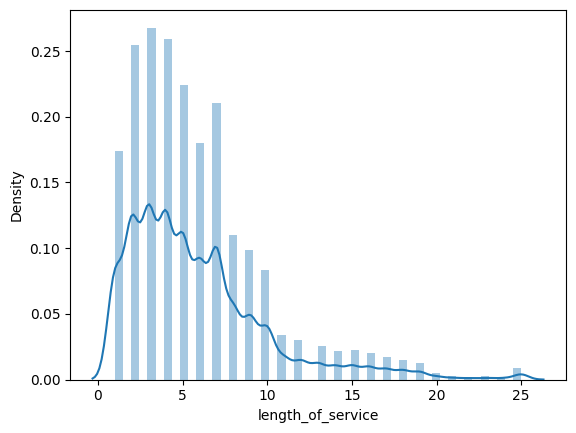

In [38]:
sns.distplot(train_test_copy1['length_of_service'])

#### Correlation 

<AxesSubplot:>

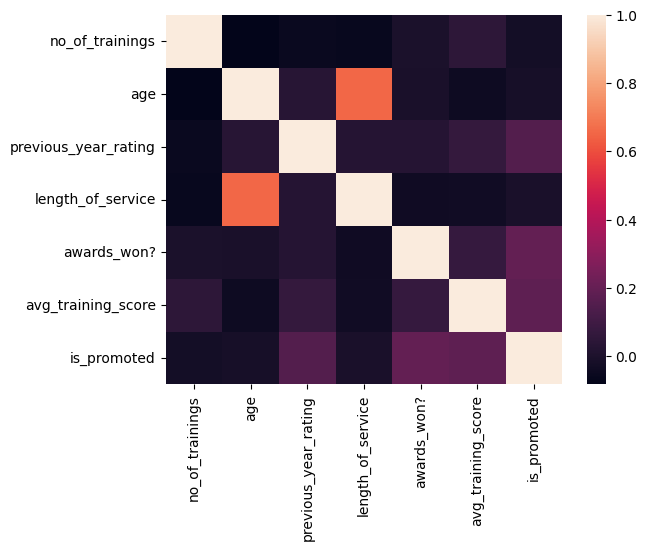

In [39]:
sns.heatmap(train_test_copy1.corr())

In [40]:
train_test_copy1.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.083148,-0.057310,-0.058745,-0.004818,0.044180,-0.024896
age,-0.083148,1.000000,0.030473,0.655323,-0.007317,-0.045060,-0.017088
previous_year_rating,-0.057310,0.030473,1.000000,0.024869,0.026524,0.068547,0.153230
length_of_service,-0.058745,0.655323,0.024869,1.000000,-0.040708,-0.035711,-0.010585
awards_won?,-0.004818,-0.007317,0.026524,-0.040708,1.000000,0.072655,0.195871
avg_training_score,0.044180,-0.045060,0.068547,-0.035711,0.072655,1.000000,0.181147
is_promoted,-0.024896,-0.017088,0.153230,-0.010585,0.195871,0.181147,1.000000


In [41]:
train_test_copy1.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0.0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0.0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0.0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0.0
5,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85,0.0
6,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59,0.0
7,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63,0.0
8,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83,0.0
9,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54,0.0


#### Categorical data to Numerical Data (Encoding)

##### for Department: Label Encoding

In [42]:
train_test_copy1['department'].value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [43]:
lb = LabelEncoder()
train_test_copy1['department']=lb.fit_transform(train_test_copy1['department'])

In [44]:
train_test_copy1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,7,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0.0
1,4,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0.0
2,7,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0.0
3,7,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0.0
4,8,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0.0


##### for Education: Label Encoding

In [45]:
train_test_copy1.education.value_counts()

Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [46]:
lb = LabelEncoder()
train_test_copy1['education']=lb.fit_transform(train_test_copy1['education'])

In [47]:
train_test_copy1.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,7,region_7,2,f,sourcing,1,35,5.0,8,0,49,0.0
1,4,region_22,0,m,other,1,30,5.0,4,0,60,0.0
2,7,region_19,0,m,sourcing,1,34,3.0,7,0,50,0.0
3,7,region_23,0,m,other,2,39,1.0,10,0,50,0.0
4,8,region_26,0,m,other,1,45,3.0,2,0,73,0.0
5,0,region_2,0,m,sourcing,2,31,3.0,7,0,85,0.0
6,4,region_20,0,f,other,1,31,3.0,5,0,59,0.0
7,4,region_34,2,m,sourcing,1,33,3.0,6,0,63,0.0
8,0,region_20,0,m,other,1,28,4.0,5,0,83,0.0
9,7,region_1,2,m,sourcing,1,32,5.0,5,0,54,0.0


##### for Region: Count Encoding using dictionary

In [48]:
train_test_copy1['region'].value_counts().to_dict()

{'region_2': 17642,
 'region_22': 9167,
 'region_7': 6825,
 'region_15': 3938,
 'region_13': 3815,
 'region_26': 3271,
 'region_31': 2779,
 'region_4': 2478,
 'region_27': 2369,
 'region_16': 2055,
 'region_28': 1913,
 'region_11': 1886,
 'region_23': 1691,
 'region_29': 1408,
 'region_32': 1378,
 'region_19': 1284,
 'region_14': 1177,
 'region_20': 1176,
 'region_17': 1157,
 'region_25': 1156,
 'region_5': 1108,
 'region_6': 988,
 'region_30': 930,
 'region_8': 924,
 'region_10': 917,
 'region_1': 848,
 'region_24': 727,
 'region_12': 715,
 'region_9': 600,
 'region_21': 590,
 'region_3': 493,
 'region_34': 447,
 'region_33': 395,
 'region_18': 51}

In [49]:
region_map=train_test_copy1['region'].value_counts().to_dict()

In [50]:
train_test_copy1['region']=train_test_copy1['region'].map(region_map)
train_test_copy1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,7,6825,2,f,sourcing,1,35,5.0,8,0,49,0.0
1,4,9167,0,m,other,1,30,5.0,4,0,60,0.0
2,7,1284,0,m,sourcing,1,34,3.0,7,0,50,0.0
3,7,1691,0,m,other,2,39,1.0,10,0,50,0.0
4,8,3271,0,m,other,1,45,3.0,2,0,73,0.0


##### for Gender and Recruitment_channel: One-Hot Encoding using get_dummies()

In [51]:
#Avoidng Dummy Trap by applying Drop First
train_test_copy1=pd.get_dummies(train_test_copy1,drop_first=True)

In [52]:
train_test_copy1.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,region_917,...,region_447,region_2478,region_1108,region_988,region_6825,region_924,region_600,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,7,2,1,35,5.0,8,0,49,0.0,0,...,0,0,0,0,1,0,0,0,0,1
1,4,0,1,30,5.0,4,0,60,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,7,0,1,34,3.0,7,0,50,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,2,39,1.0,10,0,50,0.0,0,...,0,0,0,0,0,0,0,1,0,0
4,8,0,1,45,3.0,2,0,73,0.0,0,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

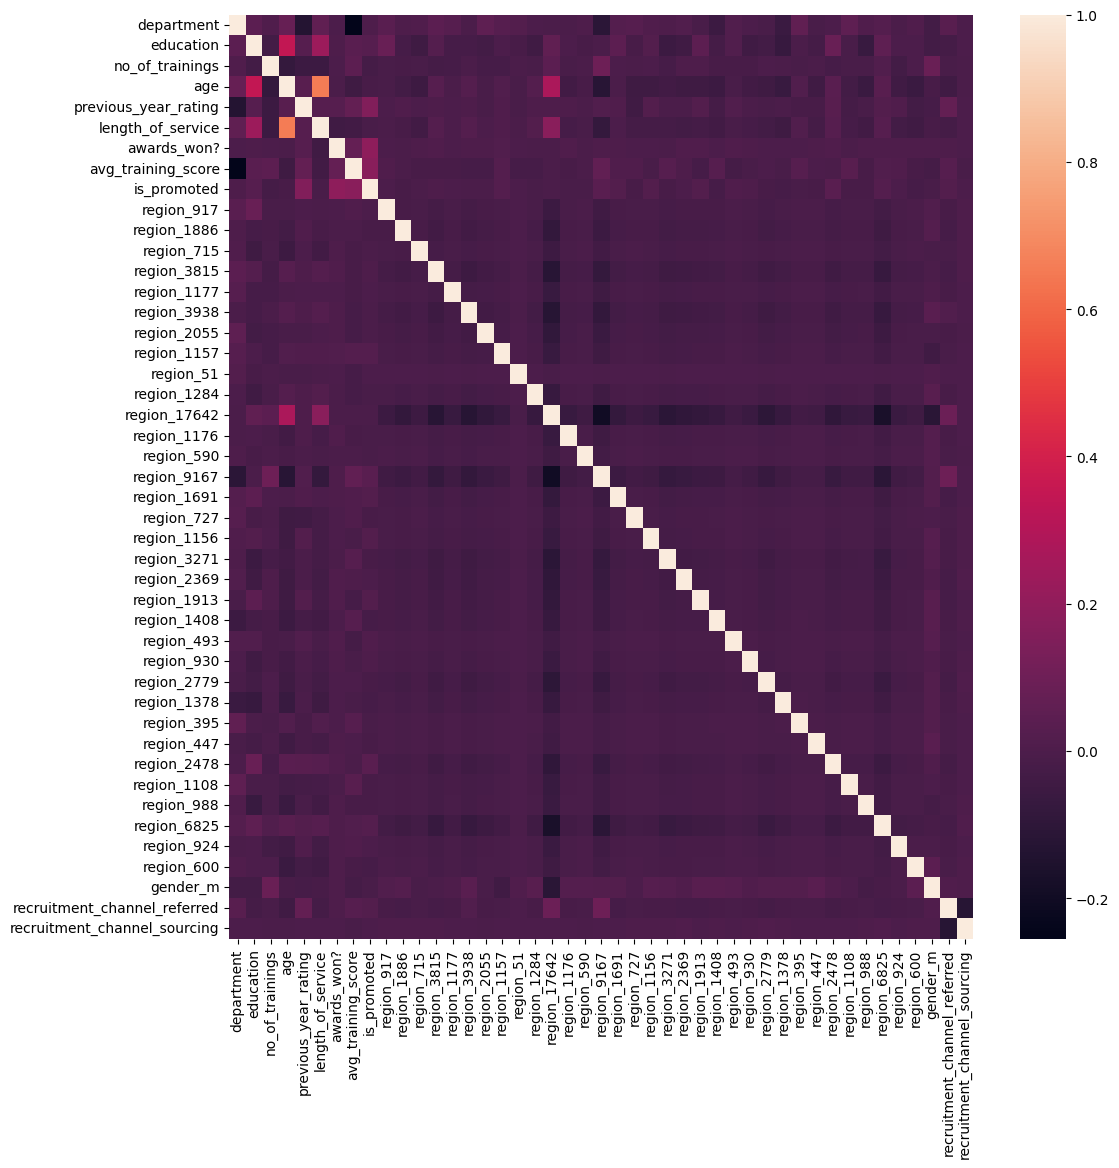

In [53]:
plt.figure(figsize=(12,12))
sns.heatmap(train_test_copy1.corr())

In [54]:
train_test_copy1.shape

(78298, 45)

In [55]:
train_test_copy1.to_csv('train_test_merged_data_cleaned.csv')